### <h1> Task 1 <h1> (Поиск минимума/максимума в векторе)

In [1]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot

In [2]:
data_lock = pd.read_csv('data/minmax_lock.csv')
data_critical = pd.read_csv('data/minmax_critical.csv')
data_reduction = pd.read_csv('data/minmax_reduction.csv')
display(data_lock)
display(data_critical)
display(data_reduction)

,Num_Threads,Iter,Time
0,1,10,60
1,2,10,45
2,3,10,34
3,4,10,36
4,5,10,36
...,...,...,...
91,12,1000000,451612
92,13,1000000,732111
93,14,1000000,883340
94,15,1000000,1058170


,Num_Threads,Iter,Time
0,1,10,2622
1,2,10,337
2,3,10,285
3,4,10,319
4,5,10,179
...,...,...,...
91,12,1000000,416444
92,13,1000000,677175
93,14,1000000,850562
94,15,1000000,960470


,Num_Threads,Iter,Time
0,1,10,41
1,2,10,34
2,3,10,40
3,4,10,36
4,5,10,36
...,...,...,...
91,12,1000000,3703
92,13,1000000,3347
93,14,1000000,3361
94,15,1000000,3181


In [3]:
labels = ['Lock', 'Critical', 'Reduction']

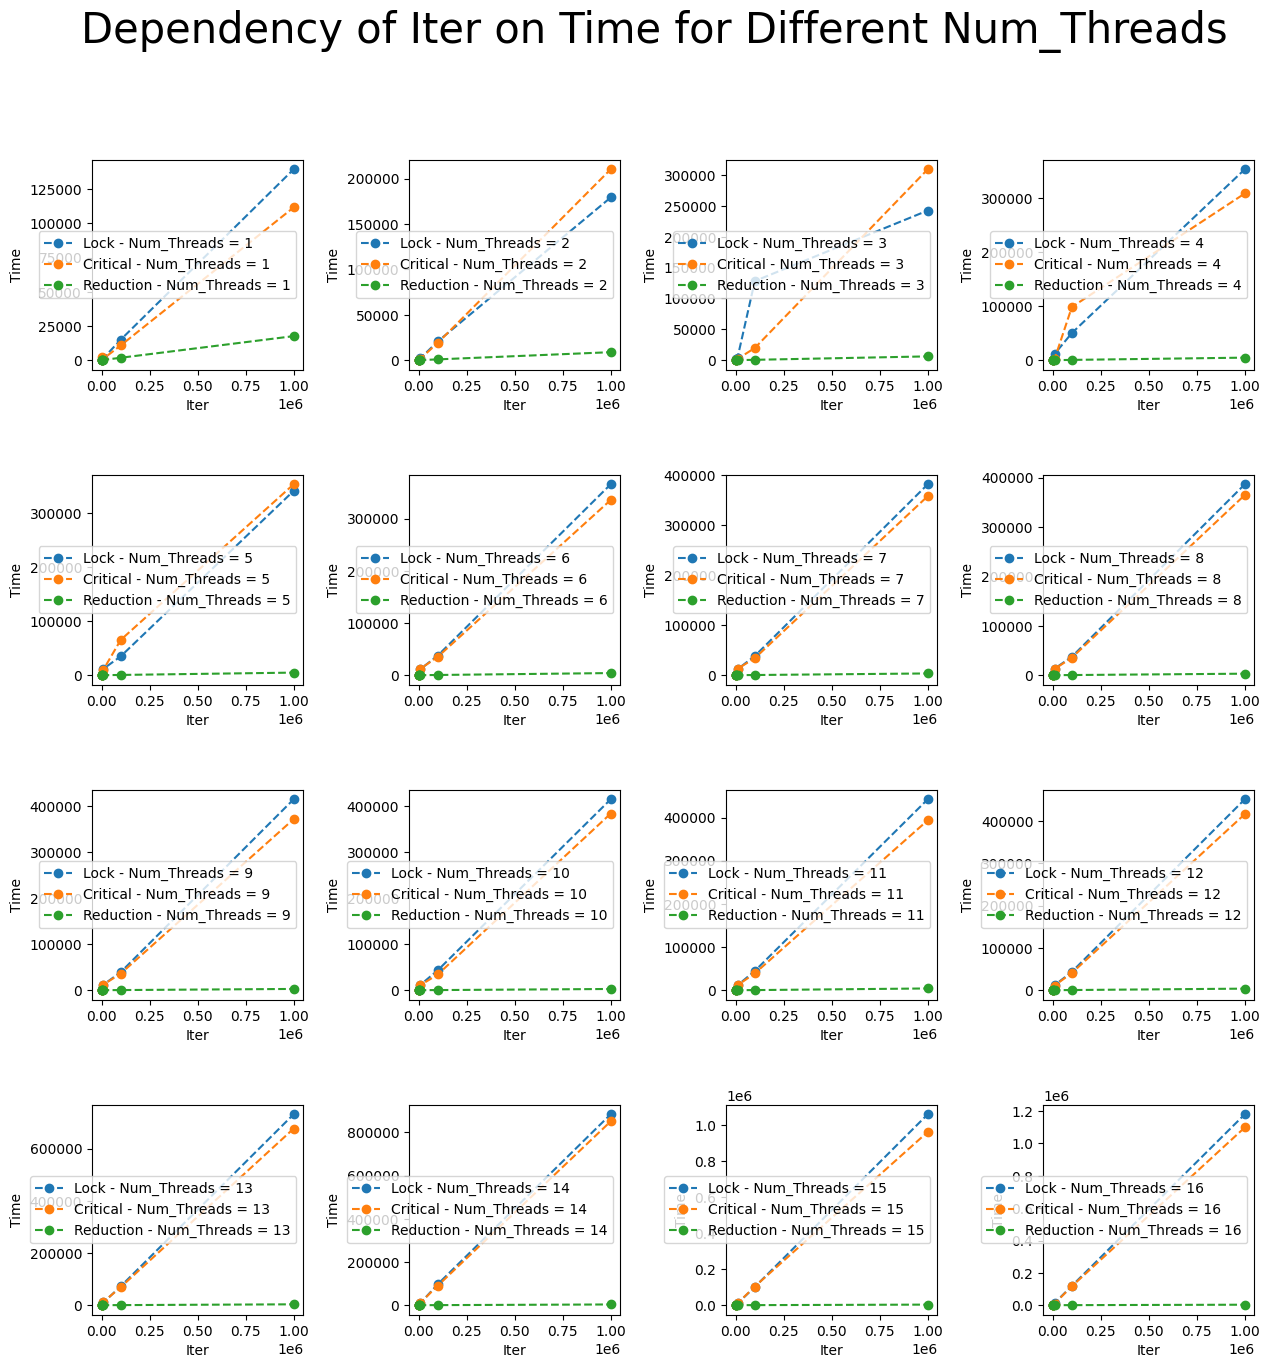

In [4]:
thread_groups_lock = data_lock.groupby('Num_Threads')
thread_groups_critical = data_critical.groupby('Num_Threads')
thread_groups_reduction = data_reduction.groupby('Num_Threads')

thread_groups = [thread_groups_lock, thread_groups_critical, thread_groups_reduction]
time_iter_plot(thread_groups, labels)

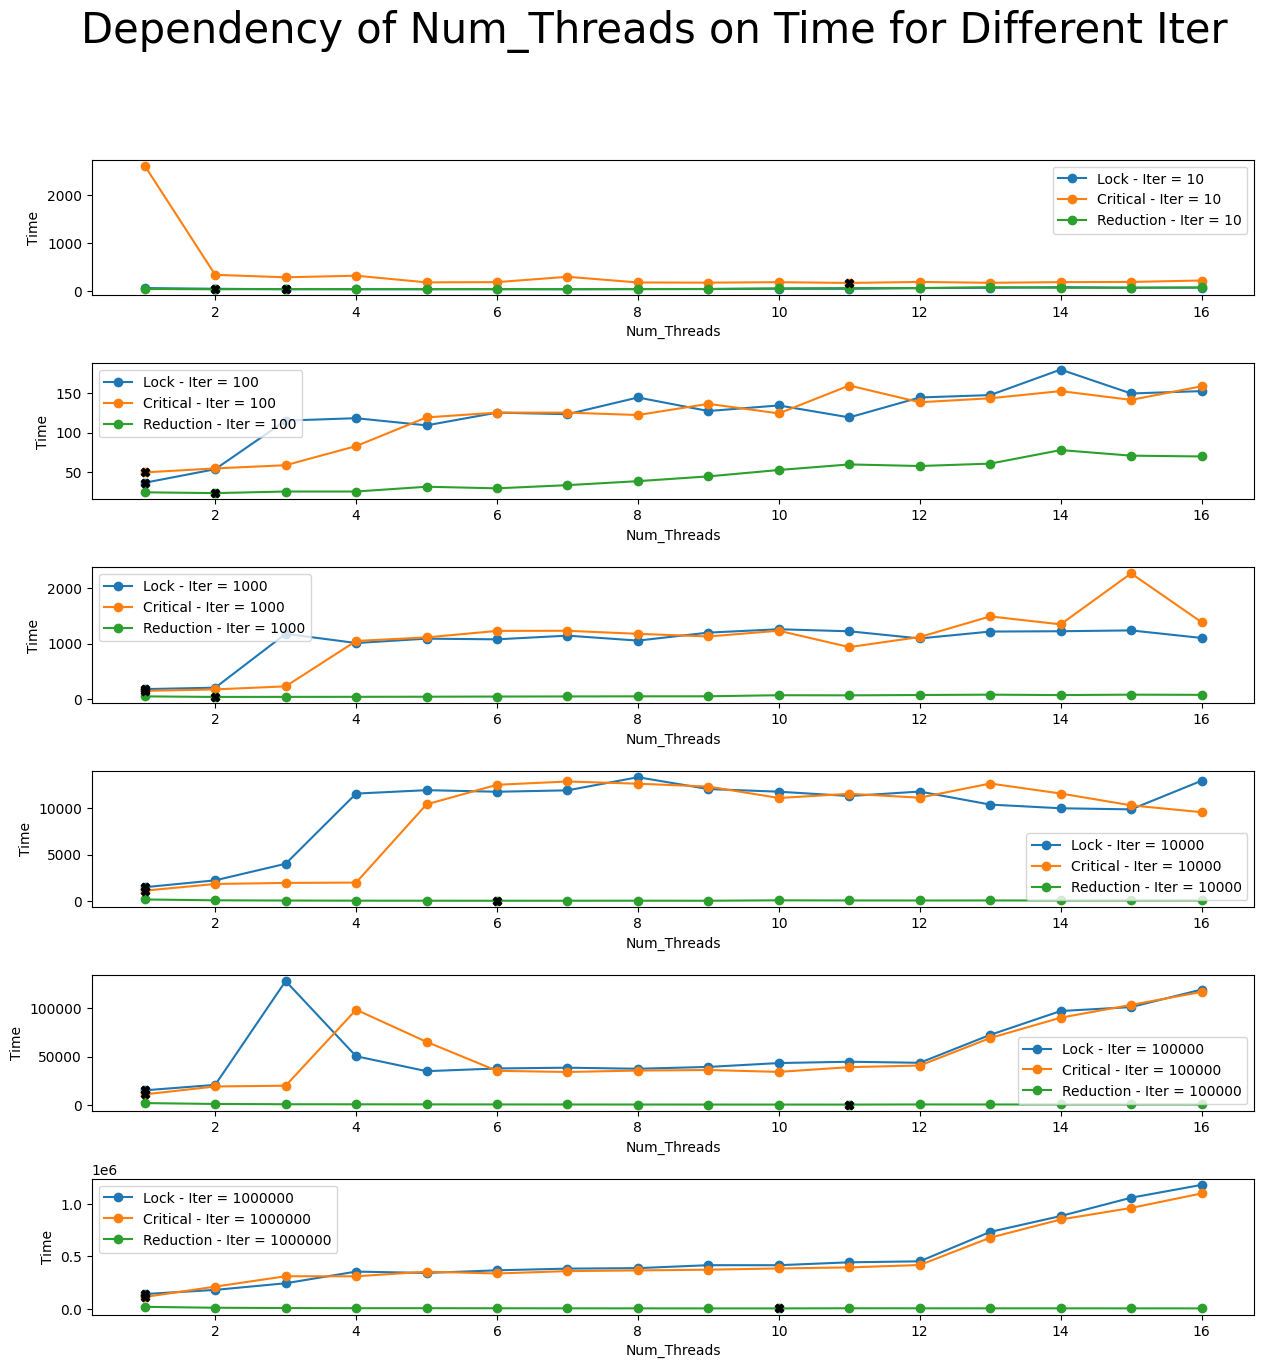

In [5]:
iter_groups_lock = data_lock.groupby('Iter', as_index=False)
iter_groups_critical = data_critical.groupby('Iter', as_index=False)
iter_groups_reduction = data_reduction.groupby('Iter', as_index=False)

iter_groups = [iter_groups_lock, iter_groups_critical, iter_groups_reduction]
time_thread_plot(iter_groups, labels)

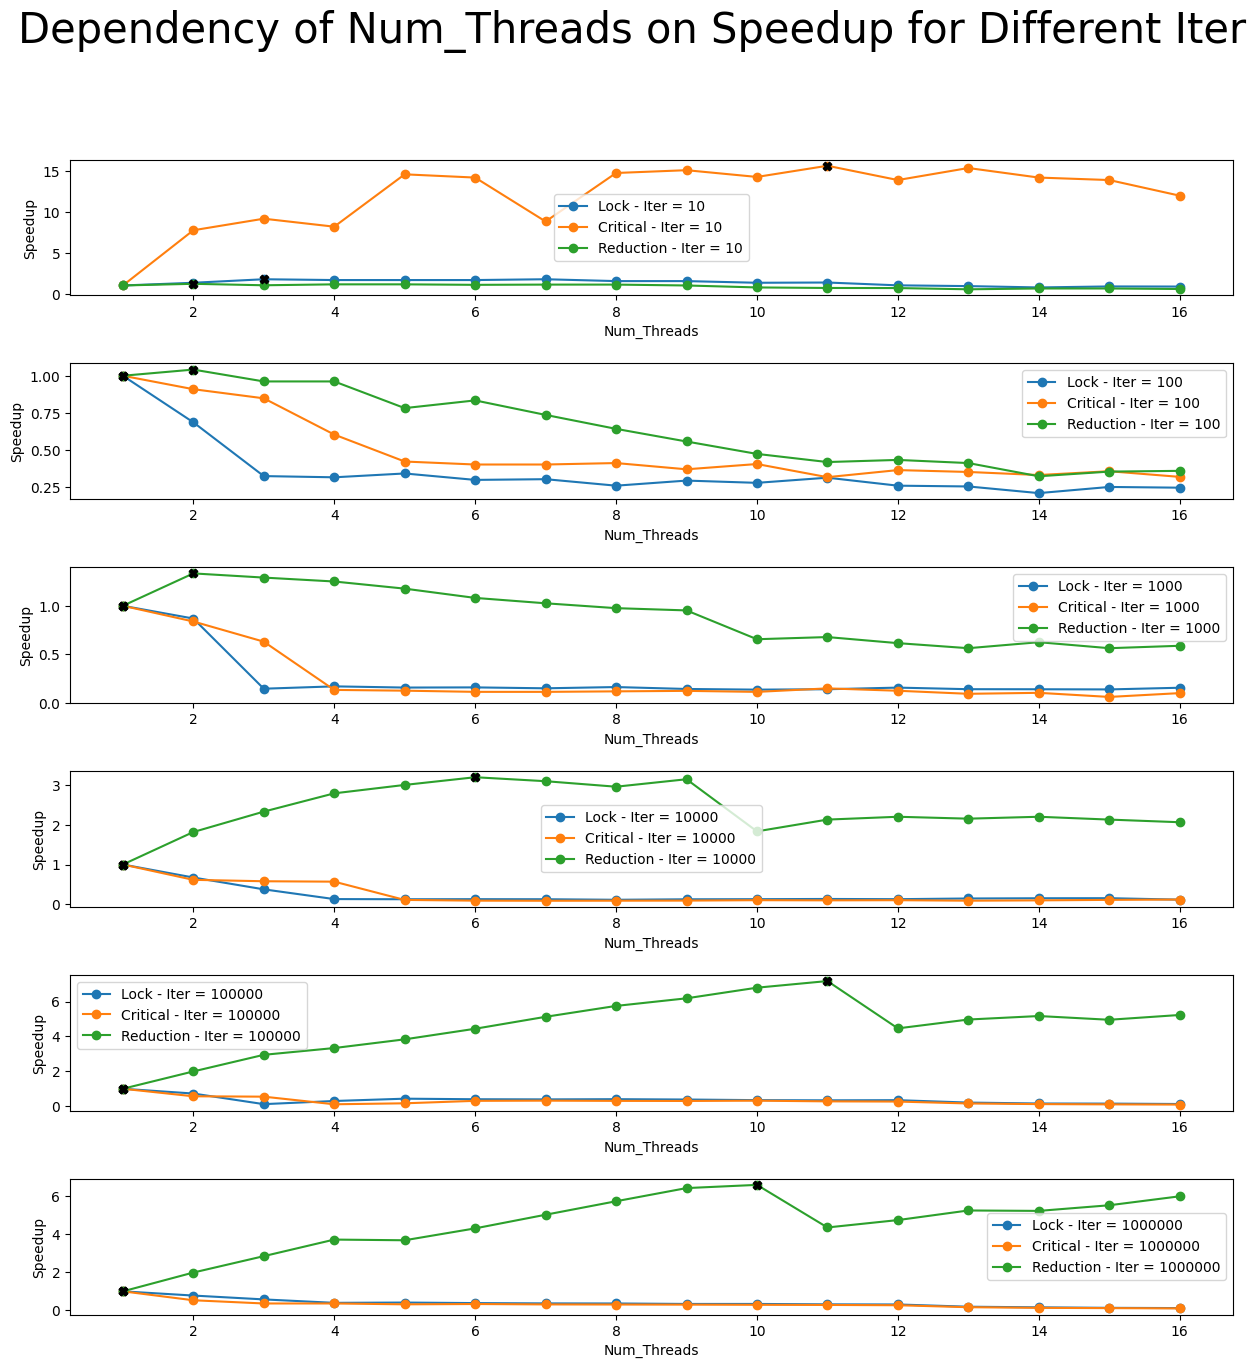

In [6]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно составить следующий рейтинг производительности для разных способов организации взаимоисключения: 
1. _Reduction_
2. _Critical_
3. _Lock_
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 